![title.png](ML_05_title.png)

![title.png](ML_05_agenda.png)

## 1. Polynomial Regression Intuition
Polynomial Regression extends linear models by adding polynomial terms to capture non-linear relationships.

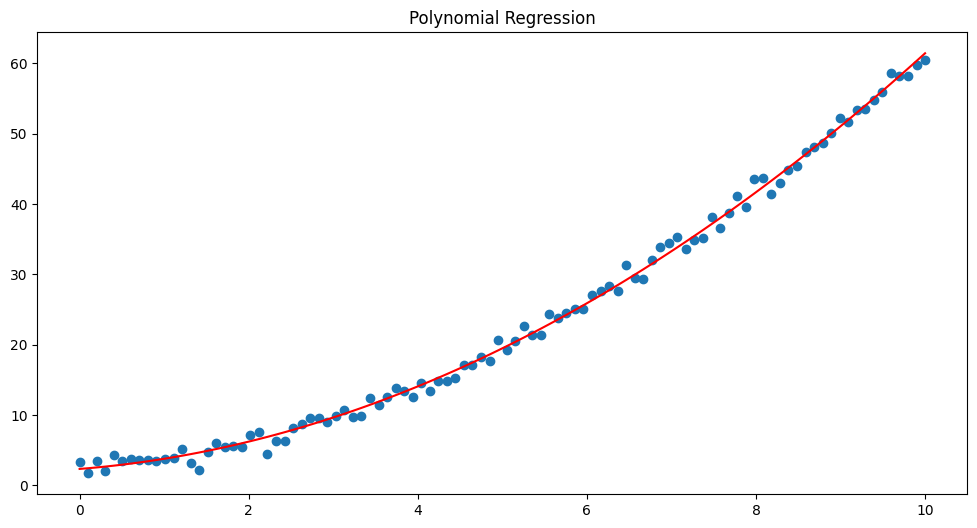

In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Polynomial Regression")
plt.show()


**Real-world use:** Used in modeling parabolic growth patterns like projectile motion or price depreciation. 

In practice, polynomial features should be used when there is a suspicion of a relationship between a feature and a target variable that can be described with a polynomial, which is rarely for each of the features in a dataset

## 2. Support Vector Regression (SVR) Intuition

Support Vector Regression (SVR) is a flexible regression technique that builds on Support Vector Machines (SVM) by introducing a **margin of tolerance** around the predicted function.

### Epsilon (𝜀) – The Tolerance Margin

SVR allows prediction errors up to a certain margin \( \varepsilon \) without penalty. This margin defines an **"epsilon tube"** around the regression function:

- Predictions within ±𝜀 of the true value incur **no loss**
- Only errors **outside this margin** are penalized

This helps focus the model on learning **significant deviations** instead of overreacting to small fluctuations.

### SVR Loss Function (𝜀-insensitive)

The SVR loss function is defined as:

$$
L_{\varepsilon}(y, \hat{y}) = 
\begin{cases}
0, & \text{if } |y - \hat{y}| \leq \varepsilon \\\\
|y - \hat{y}| - \varepsilon, & \text{otherwise}
\end{cases}
$$

This is known as the **𝜀-insensitive loss**, because errors within the margin are ignored.

### Support Vectors

Only the data points **outside the epsilon tube** influence the final model. These are called **support vectors**, and they determine the shape and position of the regression function.

### Regularization (C)

SVR uses a regularization parameter \( C \) to control the trade-off between:

- Keeping the model flat (simple)
- Allowing deviations beyond epsilon

Higher \( C \) means **less tolerance for violations** — the model will try harder to fit all points within the margin, which can lead to overfitting.

### Kernels

SVR can be made nonlinear by using **kernel functions** (e.g., RBF, polynomial). These allow SVR to model complex relationships without explicitly transforming the features. We will cover kernels more in lecture on SVM in classification lecture

---

### Summary

SVR seeks to:

- Fit a function within an acceptable error margin (𝜀)
- Ignore minor deviations within that margin
- Penalize only the "significant" errors
- Remain simple unless data justifies complexity



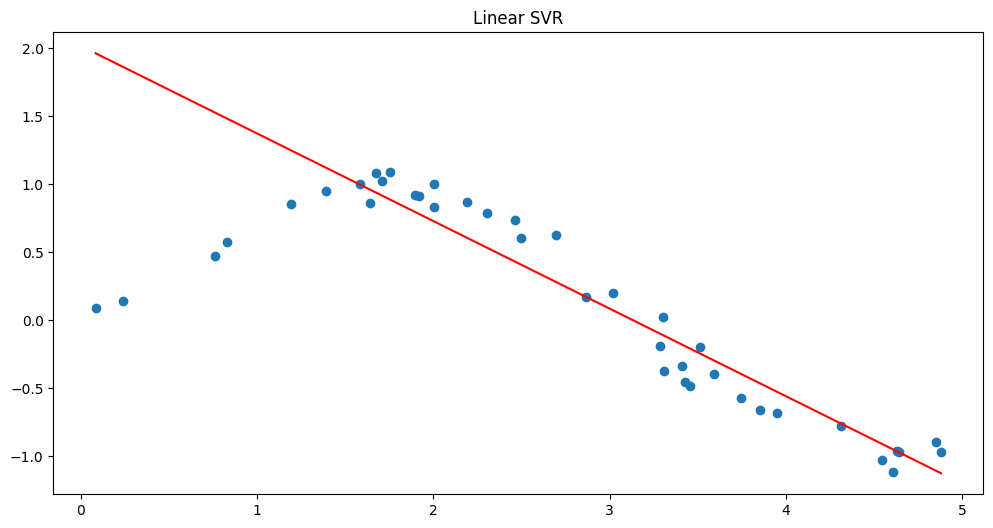

In [86]:
from sklearn.svm import SVR

X_periodic = np.sort(5 * np.random.rand(40, 1), axis=0)
y_periodic = np.sin(X_periodic).ravel() + 0.1 * np.random.randn(40)

svr_lin = SVR(kernel='linear', C=100)
svr_lin.fit(X_periodic, y_periodic)

plt.figure(figsize=(12, 6))
plt.scatter(X_periodic, y_periodic)
plt.plot(X_periodic, svr_lin.predict(X_periodic), color='red')
plt.title("Linear SVR")
plt.show()


## 3. Non-linear SVR
Non-linear SVR leverages kernel functions to capture complex patterns without explicit polynomial expansion.

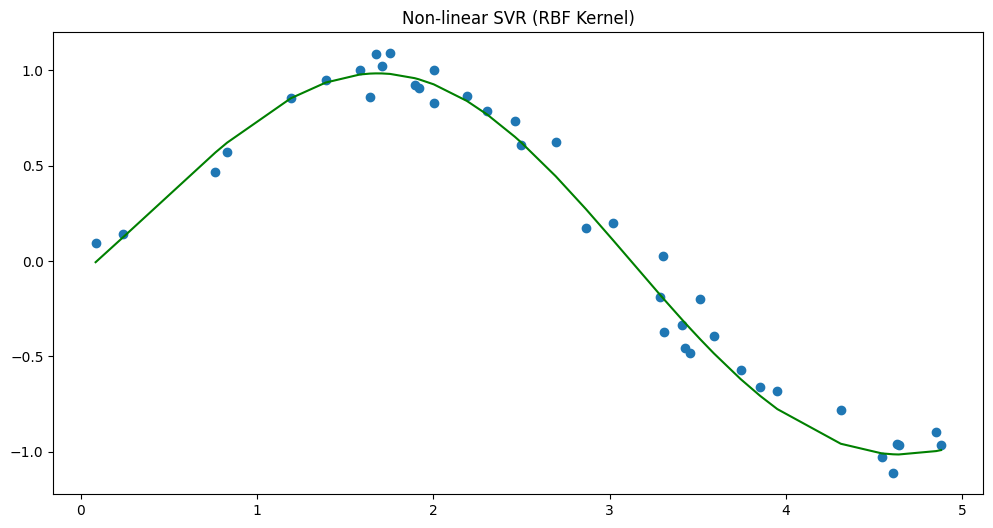

In [87]:

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X_periodic, y_periodic)

plt.figure(figsize=(12, 6))
plt.scatter(X_periodic, y_periodic)
plt.plot(X_periodic, svr_rbf.predict(X_periodic), color='green')
plt.title("Non-linear SVR (RBF Kernel)")
plt.show()


SVR was excellent when kernel methods were the best tools available. That is in the 2000's

Today, it’s mostly a niche model for:

- small datasets
- specific use cases where the epsilon-insensitive margin provides real value (e.g. Time series forecasting with margin-based constraints, gene expression data, etc)

For most real-world applications, tree-based ensembles or deep learning models outperform SVR in accuracy, interpretability, scalability, and robustness.

## 4. Decision Tree Regression
Decision Tree Regression splits data into regions and predicts a constant value for each region.

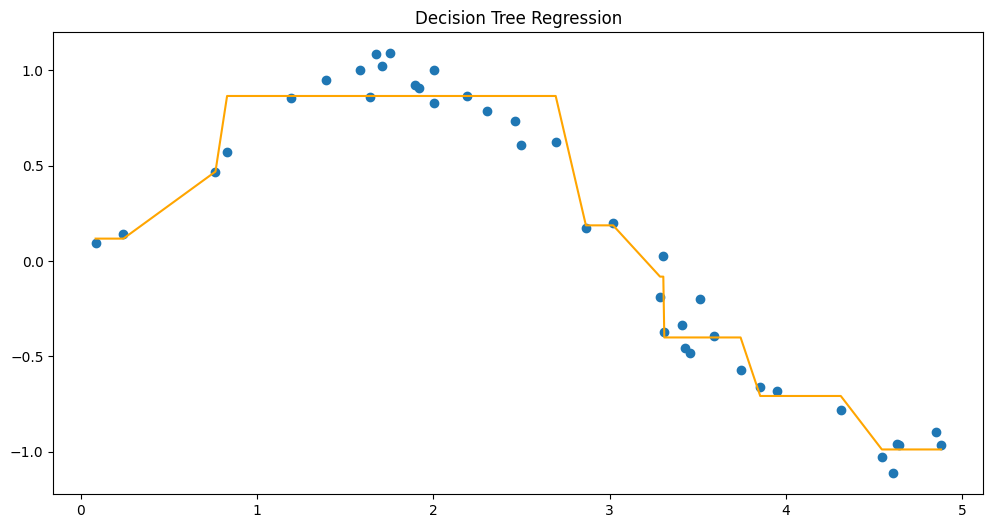

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_periodic, y_periodic)

plt.figure(figsize=(12, 6))
plt.scatter(X_periodic, y_periodic)
plt.plot(X_periodic, tree.predict(X_periodic), color='orange')
plt.title("Decision Tree Regression")
plt.show()


### How Does a Decision Tree Regressor Learn?

A Decision Tree Regressor learns by **recursively splitting the data** into smaller regions to minimize prediction error within each region.

#### Intuition Behind the Training Process

1. **Start with all data** in the root node.
2. At each step, the algorithm:
   - Considers **all features** and **all possible split points**.
   - Chooses the split that **minimizes the sum of squared errors (SSE)** in the resulting child nodes.
3. Splitting continues **greedily** (one step at a time), forming a tree structure.

Each **leaf node** holds a constant prediction — usually the **mean** of the target values in that region.

---

#### What Is the Model Actually Doing?

At training time, the tree is:
- Trying to **reduce variance** within each region (make target values more consistent).
- **Automatically discovering feature interactions** (e.g., "if age > 30 and income < 50k, predict salary = 40k").

But unlike linear regression, it does not assume any global shape — it learns **piecewise constant functions**.

---

#### Loss Function Used

A Decision Tree Regressor minimizes:

$$
\text{SSE} = \sum_{i \in \text{left}} (y_i - \bar{y}_{\text{left}})^2 + \sum_{i \in \text{right}} (y_i - \bar{y}_{\text{right}})^2
$$

At each split, it chooses the feature and threshold that minimize this sum.

---

#### Trade-off: Depth vs Overfitting

- **Shallow tree** → high bias, underfits
- **Deep tree** → low bias, high variance (overfits)

That’s why we tune parameters like `max_depth`, `min_samples_leaf`, or use ensembles (Random Forests, XGBoost) to improve generalization.


**Question time!**

## 5. Overfitting and underfitting (revised)

In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load dataset
X, y = load_diabetes(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit Linear Regression (low complexity)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fit Decision Tree with high complexity (prone to overfitting)
dtr = DecisionTreeRegressor(max_depth=None, random_state=42)
dtr.fit(X_train, y_train)

# Evaluate both models
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)
y_pred_tree_train = dtr.predict(X_train)
y_pred_tree_test = dtr.predict(X_test)

print("Linear Regression")
print("Train R²:", r2_score(y_train, y_pred_lr_train))
print("Test R²:", r2_score(y_test, y_pred_lr_test))

print("\nDecision Tree Regression")
print("Train R²:", r2_score(y_train, y_pred_tree_train))
print("Test R²:", r2_score(y_test, y_pred_tree_test))


Linear Regression
Train R²: 0.519034189167905
Test R²: 0.4849058889476755

Decision Tree Regression
Train R²: 1.0
Test R²: -0.07450922562649187


### Ridge Regression (L2 Regularization)

Ridge Regression adds an L2 penalty term to the ordinary least squares objective. It shrinks coefficients towards zero but never sets them exactly to zero.

#### Objective function:

$$
\min_{\beta} \; \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2 + \alpha \sum_{j=1}^p \beta_j^2
$$

- The first term is the **residual sum of squares (RSS)**.
- The second term is the **L2 penalty**, controlled by regularization strength $\alpha$.
- Increasing $\alpha$ forces coefficients to be smaller, reducing model complexity and helping prevent overfitting.

---

### Lasso Regression (L1 Regularization)

Lasso Regression adds an L1 penalty term that encourages sparsity — it can shrink some coefficients exactly to zero, performing feature selection.

#### Objective function:

$$
\min_{\beta} \; \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2 + \alpha \sum_{j=1}^p |\beta_j|
$$

- The first term is again the residual sum of squares.
- The second term is the **L1 penalty**, controlled by $\alpha$.
- This penalty encourages many coefficients to become zero, effectively selecting a subset of features.

---

### Key differences between Ridge and Lasso

| Aspect | Ridge (L2) | Lasso (L1) |
|--------|------------|------------|
| Penalty | Sum of squares of coefficients $\beta_j^2$ | Sum of absolute values of coefficients $|\beta_j|$ |
| Effect | Shrinks coefficients continuously | Can shrink coefficients exactly to zero (sparse solutions) |
| Use case | When many features contribute a little | When few features are important (feature selection) |



### Regularization Elastic Net Regression
Elastic Net combines L1 and L2 penalties to handle multicollinearity and perform variable selection.

Linear Regression Test MSE: 3168.93
Ridge Test MSE: 2984.96
Lasso Test MSE: 2911.59
Elastic Net Test MSE: 2820.51


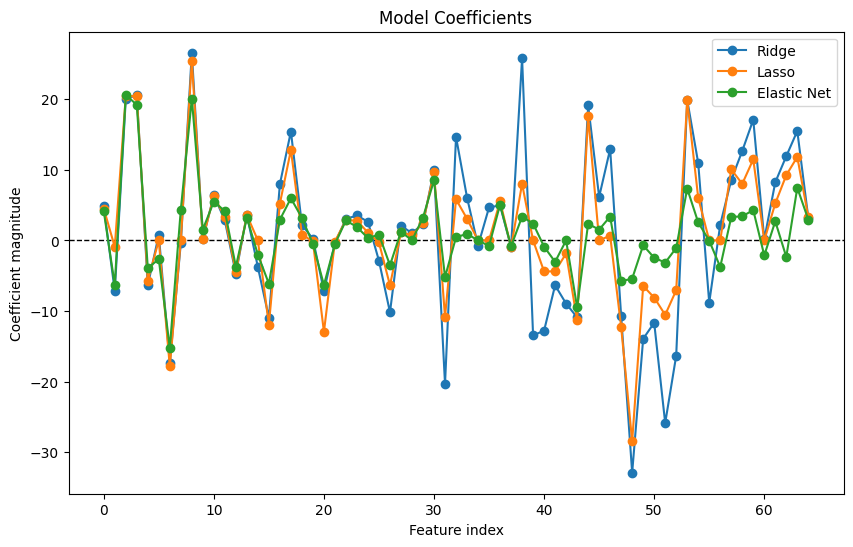

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
X, y = load_diabetes(return_X_y=True)

# Add polynomial features to increase dimensionality and complexity
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1, max_iter=10000)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)

# Fit models
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_enet = elastic_net.predict(X_test_scaled)

# Evaluate
print(f"Linear Regression Test MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Ridge Test MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Lasso Test MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Elastic Net Test MSE: {mean_squared_error(y_test, y_pred_enet):.2f}")

# Visualize coefficients
plt.figure(figsize=(10, 6))
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # zero line
# plt.plot(lr.coef_, label='Linear Regression', marker='o')
plt.plot(ridge.coef_, label='Ridge', marker='o')
plt.plot(lasso.coef_, label='Lasso', marker='o')
plt.plot(elastic_net.coef_, label='Elastic Net', marker='o')
plt.title('Model Coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.show()


**Question time!**

## 6. Random Forest Regression
Random Forest is an ensemble of decision trees that improves accuracy and reduces overfitting.

### How Does a Random Forest Work?

A **Random Forest** is an ensemble method that builds many individual **Decision Trees** and aggregates their predictions. It leverages the idea that **many weak learners can combine into a strong one**, especially when the individual models are diverse and overfitting in different ways.

---

#### How Ensembling Works in Random Forests

1. **Bootstrap Aggregation (Bagging):**
   - Each tree is trained on a **random subset of the training data**, sampled *with replacement*.
   - This introduces **diversity among trees**, even if the underlying data has patterns that could cause overfitting.

2. **Random Feature Selection:**
   - At each split in a tree, only a **random subset of features** is considered.
   - This further reduces correlation between trees and forces them to explore different splits.

3. **Prediction Aggregation:**
   - For **regression**, predictions are averaged across all trees:
     $$
     \hat{y} = \frac{1}{T} \sum_{t=1}^{T} \hat{y}^{(t)}
     $$
   - For **classification**, predictions are typically made by majority vote.

---

#### Why This Improves Accuracy

- Averaging reduces the **variance** of individual trees.
- By combining many noisy, high-variance models, the Random Forest creates a **more stable and accurate** predictor.

---

#### Why This Reduces Overfitting

- A single decision tree can easily **overfit** to the training data.
- Random Forests reduce overfitting by:
  - **Training on different subsets** of the data (bagging)
  - **Limiting the feature space** at each split
- As a result, the individual errors of the trees tend to **cancel out**, while the true signal gets amplified.

---

#### Summary

| Feature | Single Decision Tree | Random Forest |
|--------|----------------------|----------------|
| Accuracy | May be low on test set | Often high due to averaging |
| Variance | High | Reduced by ensembling |
| Bias | Low | Slightly increased, but offset by lower variance |
| Overfitting Risk | High | Lower |

Random Forests are powerful **out-of-the-box models** for many structured data problems due to their balance of accuracy, robustness, and interpretability.


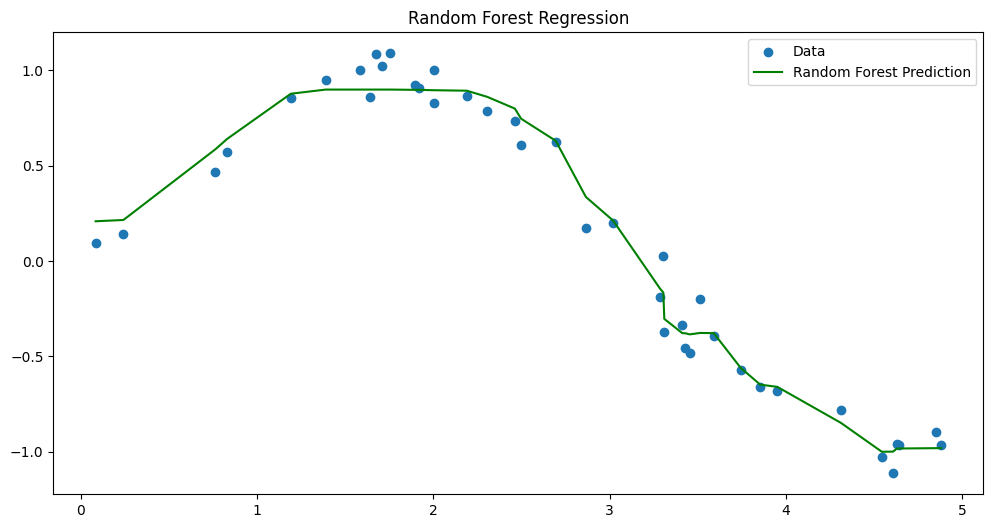

In [91]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Fit Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
forest.fit(X_periodic, y_periodic)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_periodic, y_periodic, label='Data')
plt.plot(X_periodic, forest.predict(X_periodic), color='green', label='Random Forest Prediction')
plt.title("Random Forest Regression")
plt.legend()
plt.show()


## 6. Evaluation of Regression Models
Regression model performance is typically assessed using metrics such as:
- R² score,
- Adjusted R-squared,
- Mean Squared Error (MSE),
- Mean Absolute Error (MAE),
- Root Mean Square Error (RMSE)
- Mean Average Percentage Error (MAPE)

### R² Score (Coefficient of Determination)

The R² score is a statistical measure that indicates how well the regression predictions approximate the real data points.

Mathematically, it is defined as:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

Where:
- $ SS_{\text{res}} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $ is the residual sum of squares (unexplained variance)
- $ SS_{\text{tot}} = \sum_{i=1}^{n}(y_i - \bar{y})^2 $ is the total sum of squares (total variance)
- $ y_i $ are the true values
- $ \hat{y}_i $ are the predicted values
- $ \bar{y} $ is the mean of true values

#### Interpretation:
- $ R^2 = 1 $: Perfect fit
- $ R^2 = 0 $: Model does no better than simply predicting the mean
- $ R^2 < 0 $: Model performs worse than predicting the mean

R² helps assess the explanatory power of the model — the proportion of variance in the dependent variable that is predictable from the independent variables.


### Adjusted R²

While R² always increases (or stays the same) as more predictors are added to the model, **Adjusted R²** compensates for this by penalizing the addition of irrelevant features. It provides a more accurate measure of goodness-of-fit when comparing models with different numbers of predictors.

The formula for Adjusted R² is:

$$
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$$

Where:
- $ R^2 $ is the regular coefficient of determination
- $ n $ is the number of observations
- $ p $ is the number of predictors (independent variables)

#### Key Differences Between R² and Adjusted R²

| Concept | R² | Adjusted R² |
|--------|----|--------------|
| Effect of adding features | Never decreases | Can decrease if new predictors don’t improve the model |
| Usefulness | Good for single-model performance | Better for comparing models with different numbers of predictors |
| Bias | May overestimate model fit | Penalizes complexity to avoid overfitting |

#### When to Use Adjusted R²:
- When you're comparing models with different numbers of predictors
- When overfitting is a concern due to many features



### Mean Squared Error (MSE)

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- Penalizes **larger errors more heavily** due to squaring.
- Sensitive to outliers.
- Lower MSE indicates better performance.

---

### Mean Absolute Error (MAE)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

- Measures average magnitude of errors.
- Less sensitive to outliers than MSE.
- Easier to interpret in real units of the target variable.

---

### Root Mean Squared Error (RMSE)

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

- Square root of MSE.
- Has the same units as the target variable.
- Emphasizes larger errors (like MSE) but more interpretable.

---

### Mean Absolute Percentage Error (MAPE)

$$
\text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

- Expresses error as a percentage of the actual values.
- Useful for comparing models across different scales.
- Not defined when $ y_i = 0 $; sensitive to small denominators.


In [96]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
import numpy as np

svr_rbf_pred = svr_rbf.predict(X_periodic)
t_pred = tree.predict(X_periodic)
f_pred = forest.predict(X_periodic)

for y_pred in [svr_rbf_pred, t_pred, f_pred]:
    print(namestr(y_pred, globals())[1])
    print("MSE:", mean_squared_error(y_periodic, y_pred))
    print("MAE:", mean_absolute_error(y_periodic, y_pred))
    print("RMSE:", root_mean_squared_error(y_periodic, y_pred))
    print("R² Score:", r2_score(y_periodic, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_periodic, y_pred))
    print("")


svr_rbf_pred
MSE: 0.009392442507445538
MAE: 0.07851624379470315
RMSE: 0.09691461451940847
R² Score: 0.9825619081024421
MAPE: 0.40000544983604386

t_pred
MSE: 0.013763873376402145
MAE: 0.08708179175811966
RMSE: 0.11731953535708427
R² Score: 0.9744458708569379
MAPE: 0.2652091007032265

f_pred
MSE: 0.008242818003986806
MAE: 0.0721911401281252
RMSE: 0.09078996642794183
R² Score: 0.984696311131591
MAPE: 0.3627455258155271



**Overfitting time!**

![title.png](ML_05_last.png)